# The Money vs Bitcoin?: An Analysis of Bitcoin as an Institional Investment

## Introduction

The implementation of Bitcoin as open-source software twelve years ago has turned out to be a pivotal moment for the financial markets. Bitcoin was conceived in a whitepaper published on 31 October 2008 as a decentralised digital currency. It is decentralised in the sense that as a cryptographic currency - dubbed 'cryptocurrency' - it is neither issued nor managed by a single administrative authority such as a central bank. Instead, Bitcoin relies on a peer-to-peer bitcoin network, and is created as an incentive for node operators to engage in a process called mining. Transactions, through which the currency is sent or received, are conducted on the bitcoin network. The transactions are cryptographically verified by nodes on the network and recorded in an immutable, publicly distributed ledger called a blockchain.  

Considering its initial intended utility as a currency, it is difficult to assert whether Satoshi Nakamoto envisioned the technology as a mainstream financial asset. There are currently ongoing intense debates about the investment credibility of digital cryptocurrencies such as Bitcoin, with some investors hailing them as 'sound money', while others view them as nothing more than a speculative bubble. The criticisms for Bitcoin range from its alleged usage in criminal activity, to its energy consumption during mining, and even to questioning of the need for a different currency to exist at all. Regardless, in 2021 alone, Bitcoin had notable successes such as its adoption as legal tender by El Salvador, and reaching an all-time high of over US$68,000 per bitcoin on the publicly traded markets. The former was a clear signal of Bitcoin's increased adoption and quashed the slowly prevailing opinion at the time: that Bitcoin was not useful as a currency or medium of exchange. The latter, spurred by increased adoption and the introduction of an American Bitcoin futures exchange traded fund, cemented Bitcoin's place as a legitimately tradable financial asset in the world's largest economy. Bitcoin's fixed supply, which stands in stark opposition to fiat currencies' potentially unlimited supply, seems to be the most compelling reason for investing in the cryptocurrency. This is the view expressed by institutional investors such as Michael Saylor, who refers to Bitcoin as property, and continues to add the asset to MicroStrategy's balance sheet.

The most prominent criticism when it comes to investing in Bitcoin is that of price volatility. The price of a bitcoin has gone through dramatic cycles of appreciation and depreciation. Indeed, this has become a defining feature of cryptoassets in general, with other popular cryptoassets such as Ethereum (the second largest cryptoasset by market capitalisation) exhibiting similar tendencies. The cryptoasset class is historically known to be several times more volatile than other traditional asset classes such as gold and equity indices. However, is this reason enough for an investment fund to completely avoid investing in Bitcoin? After all, high volatility can also present an opportunity for higher returns. This report seeks to provide answers to this question, based on recent market data. The aim of the report is to assess the suitability of investing some of a fund's assets into Bitcoin. This will be accomplished by analysing Bitcoin purely from an investment perspective, and comparing the asset to two traditional assets, namely gold and the S&P 500 index. The research conducted in the report is guided by the following questions:<br>
<ul>
<li>How does the performance of Bitcoin compare to the S&P 500 and the price of gold?</li>
<li>Could adding Bitcoin improve the performance of a portfolio?</li>
<li>Can Bitcoin be used as a hedge against inflation?</li>
<li>Can we build a portfolio using some or all of these assets?</li> 
</ul>

The investment fund's CFO is seeking to lower volatility in the fund. Therefore, the recommendations from this report prioritise the minimisation of overall risk.

NB: It is always worth noting that past performance is not indicative of future performance. Furthermore, the work presented herein is not to be taken as financial advice; please consult with a financial advisor and/or do your own research research before investing.

## Executive Summary

## Data and Methods

### Libraries

In [1]:

import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### The Data Set

#### Bitcoin Data

In [2]:

bitcoin_prices = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin_prices = bitcoin_prices.sort_values(by='date')
bitcoin_prices.set_index('date', inplace=True)
bitcoin_prices.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [3]:
bitcoin_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2615 non-null   float64
 1   high    2615 non-null   float64
 2   low     2615 non-null   float64
 3   close   2615 non-null   float64
 4   volume  2615 non-null   float64
dtypes: float64(5)
memory usage: 122.8 KB


#### S&P 500 Data

In [4]:

sp500_prices = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500_prices = sp500_prices.sort_values(by='date')
sp500_prices.set_index('date', inplace=True)
sp500_prices.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [5]:
sp500_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1805 non-null   float64
 1   high    1805 non-null   float64
 2   low     1805 non-null   float64
 3   close   1805 non-null   float64
 4   volume  1805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 84.6 KB


#### Gold and Inflation Data

In [6]:

monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data = monthly_data.sort_values(by='date')
monthly_data.set_index('date', inplace=True)
monthly_data.head()

,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812


In [7]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-01 to 2021-11-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gold_usd  87 non-null     float64
 1   cpi_us    87 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


### Data Cleaning


How does the performance of Bitcoin compare to the S&P500 and the price of gold?

## Asset Performance

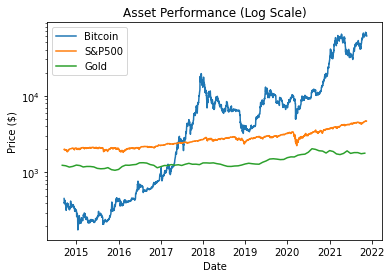

In [8]:

# Plot line graph of asset prices
plt.plot(bitcoin_prices['close'], label='Bitcoin')
plt.plot(sp500_prices['close'], label='S&P500')
plt.plot(monthly_data['gold_usd'], label='Gold')
plt.legend()
plt.title('Asset Performance (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.show()

In [9]:
# Calculate simple returns of the assets over time
bitcoin_prices['btc_returns'] = bitcoin_prices['close'].pct_change()
sp500_prices['sp_returns'] = sp500_prices['close'].pct_change()
monthly_data['gld_returns'] = monthly_data['gold_usd'].pct_change()

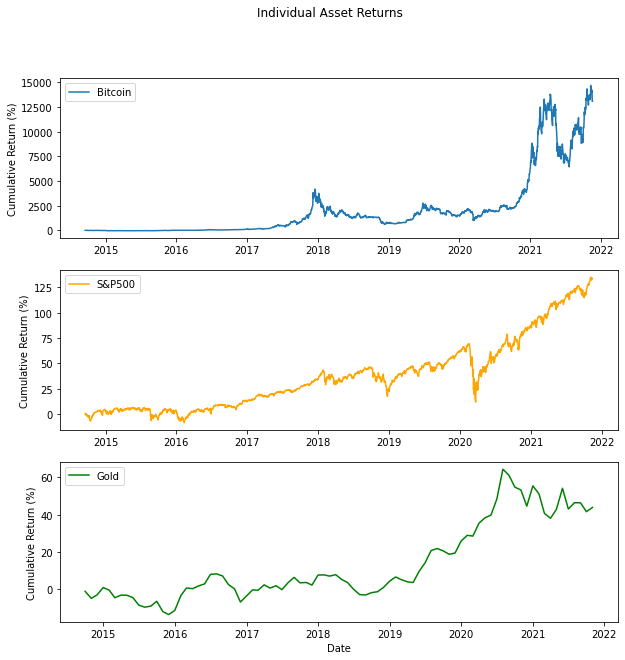

In [10]:

fig, ax = plt.subplots(3,1, figsize=(10,10))
fig.suptitle('Individual Asset Returns')
label_position = 'upper left'

ax[0].plot(((1+bitcoin_prices['btc_returns']).cumprod()-1)*100, label='Bitcoin')
ax[0].set_ylabel('Cumulative Return (%)')
ax[0].legend(loc=label_position)
ax[1].plot(((1+sp500_prices['sp_returns']).cumprod()-1)*100, label='S&P500', color='orange')
ax[1].set_ylabel('Cumulative Return (%)')
ax[1].legend(loc=label_position)
ax[2].plot(((1+monthly_data['gld_returns']).cumprod()-1)*100, label='Gold', color='green')
ax[2].set_ylabel('Cumulative Return (%)')
ax[2].legend(loc=label_position)

plt.xlabel('Date')
plt.show()

### Bitcoin outperformed the S&P 500 Index

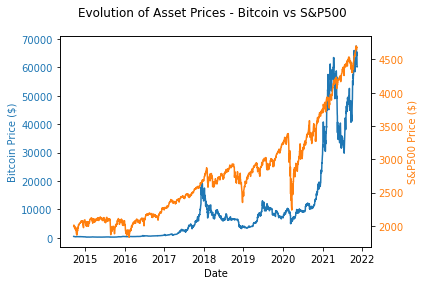

In [11]:

fig, ax1 = plt.subplots()
fig.suptitle('Evolution of Asset Prices - Bitcoin vs S&P500')

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('S&P500 Price ($)', color=color)  
ax2.plot(sp500_prices['close'], label='S&P 500', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

### Bitcoin outperformed Gold

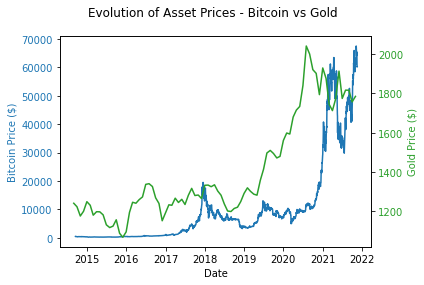

In [12]:

fig, ax1 = plt.subplots()
fig.suptitle('Evolution of Asset Prices - Bitcoin vs Gold')

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Gold Price ($)', color=color)  
ax2.plot(monthly_data['gold_usd'], label='Gold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()


Analyze Bitcoin's returns and volatility profile.

### Asset Returns and Volatility Profile

In [13]:

# Upsample BTC and SP500 returns to monthly returns to match Gold returns
btc_returns_monthly = bitcoin_prices[['btc_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 
sp_returns_monthly = sp500_prices[['sp_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 

# Match dates and number of observations
# Gold first date observation ~ BTC/SP500 last date observation
btc_pct_monthly_returns = btc_returns_monthly[:-1].dropna().to_numpy() * 100
sp_pct_monthly_returns = sp_returns_monthly[:-1].dropna().to_numpy() *  100
gld_pct_monthly_returns = monthly_data['gld_returns'].dropna().to_numpy() * 100

# Shift dates of BTC and S&P500 returns dataframes to match
btc_returns_monthly['shifted_date'] = btc_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(btc_returns_monthly))], unit='D')
sp_returns_monthly['shifted_date'] = sp_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(sp_returns_monthly))], unit='D')

In [14]:

# Create dataframe of returns
returns_df = pd.merge(btc_returns_monthly, sp_returns_monthly, on='shifted_date')
returns_df = pd.merge(returns_df, monthly_data[['gld_returns']], left_on='shifted_date', right_on='date')
returns_df = returns_df.rename(columns={'shifted_date':'date'})
returns_df.set_index('date', inplace=True)

In [15]:
returns_df.head()

,btc_returns,sp_returns,gld_returns
date,,,
2014-10-01,-0.153914,-0.014628,-0.014311
2014-11-01,-0.125659,0.023201,-0.038537
2014-12-01,0.117421,0.024534,0.020424
2015-01-01,-0.153034,-0.004189,0.040729
2015-02-01,-0.320835,-0.031041,-0.014594


### Frequency Distribution

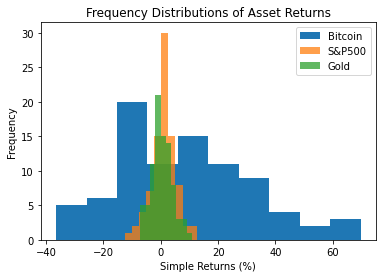

In [16]:

# Frequency distribution of returns
plt.hist(btc_pct_monthly_returns, bins=math.ceil(np.sqrt(len(btc_pct_monthly_returns))), density=False, label='Bitcoin')
plt.hist(sp_pct_monthly_returns, bins=math.ceil(np.sqrt(len(sp_pct_monthly_returns))), density=False, label='S&P500', alpha=0.75)
plt.hist(gld_pct_monthly_returns, bins=math.ceil(np.sqrt(len(gld_pct_monthly_returns))), density=False, label='Gold', alpha=0.75)
plt.legend()
plt.title('Frequency Distributions of Asset Returns')
plt.xlabel('Simple Returns (%)')
plt.ylabel('Frequency')
plt.show()

### Time Series

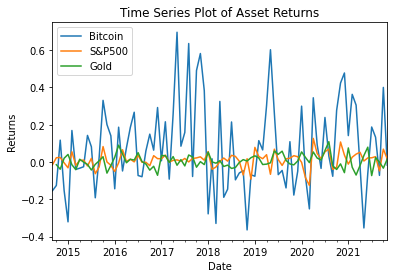

In [17]:

# Plot returns as time series
btc_returns_monthly.btc_returns.plot(label='Bitcoin')
sp_returns_monthly.sp_returns.plot(label='S&P500')
monthly_data['gld_returns'].plot(label='Gold')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Time Series Plot of Asset Returns')
plt.show()

### The Four Asset Moments

#### Bitcoin Moments

In [18]:

# Calculate BTC moments
btc_mean_ret = np.mean(btc_pct_monthly_returns)
btc_ann_ret = ((1+btc_mean_ret)**12)-1
btc_vol = np.std(btc_pct_monthly_returns)
btc_ann_vol = btc_vol * np.sqrt(12)
btc_skew = stats.skew(btc_pct_monthly_returns)
btc_kurtosis = stats.kurtosis(btc_pct_monthly_returns)

p_value = stats.shapiro(btc_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The BITCOIN data are likely not normal.")
else:
    print("Null hypothesis not rejected. The BITCOIN data are likely normal.")

p-value: 0.12015186250209808
Null hypothesis not rejected. The BITCOIN data are likely normal.


#### S&P 500 Moments

In [19]:

# Calculate S&P500 moments
sp_mean_ret = np.mean(sp_pct_monthly_returns)
sp_ann_ret = ((1+sp_mean_ret)**12)-1
sp_vol = np.std(sp_pct_monthly_returns)
sp_ann_vol = sp_vol * np.sqrt(12)
sp_skew = stats.skew(sp_pct_monthly_returns)
sp_kurtosis = stats.kurtosis(sp_pct_monthly_returns)

p_value = stats.shapiro(sp_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The S&P500 data are likely not normal.")
else:
    print("Null hypothesis not rejected. The S&P500 data are likely normal.")

p-value: 0.027456678450107574
Null hypothesis is rejected. The S&P500 data are likely not normal.


#### Gold Moments

In [20]:

# Calculate GLD moments
gld_mean_ret = np.mean(gld_pct_monthly_returns)
gld_ann_ret = ((1+gld_mean_ret)**12)-1
gld_vol = np.std(gld_pct_monthly_returns)
gld_ann_vol = gld_vol + np.sqrt(12)
gld_skew = stats.skew(gld_pct_monthly_returns)
gld_kurtosis = stats.kurtosis(gld_pct_monthly_returns)

p_value = stats.shapiro(gld_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The GOLD data are likely not normal.")
else:
    print("Null hypothesis not rejected. The GOLD data are likely normal.")

p-value: 0.681982696056366
Null hypothesis not rejected. The GOLD data are likely normal.


> Insert summary <b>{here}<b>

## Portfolio Construction

### Initial Considerations

In [21]:

# Add plot and table of returns+volatility profile

### What's Inflation Got To Do With It?

### Correlation and Covariance

In [22]:
# Add analysis of Bitcoin as a hedge for inflation and add CPI to corr matrix below

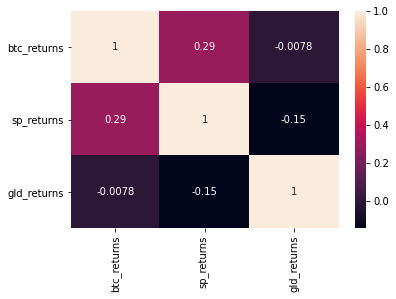

In [23]:

# calculate the Pearson correlation coefficient matrix
# this tells us how similarly each variable moves relative to another
# use correlation matrix to build correlation heatmap
correlation_matrix = returns_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()


The CFO is looking to lower volatility in the fund. Explore building a portfolio of some or all of these assets. Make a recommendation that minimizes overall risk.

In [24]:
num_assets = 3
assets = ['Bitcoin', 'S&P500', 'Gold']
equal_weights = np.repeat(1/num_assets, num_assets)

In [25]:

# calculate the covariance matrix of the 3 assets
# NOTE: correlation is a normalised measure of the covariance
# this tells us the joint variablity (risk) of any two variables
covariance_matrix = returns_df.cov()
print(covariance_matrix)

             btc_returns  sp_returns  gld_returns
btc_returns     0.053247    0.002765    -0.000065
sp_returns      0.002765    0.001704    -0.000217
gld_returns    -0.000065   -0.000217     0.001309


In [26]:

# calculate monthly portfolio volatility using the covariance matrix, assuming equal weighted portfolio
portfolio_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(covariance_matrix, equal_weights)))
print("Estimated monthly portfolio volatility: {:.2f}".format(portfolio_volatility*100)+"%.")

Estimated monthly portfolio volatility: 8.25%.


In [27]:

# annualise the covariance matrix for portfolio optimisation
# calculate annualised portfolio volatility using the covariance matrix, assuming equal weighted portfolio
annualised_covariance_matrix = covariance_matrix * 12
annualised_portfolio_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(annualised_covariance_matrix, equal_weights)))
print("Estimated annualised portfolio volatility: {:.2f}".format(annualised_portfolio_volatility*100)+"%.")

Estimated annualised portfolio volatility: 28.57%.


### Portfolio Optimisation

#### Applying Modern Portfolio Theory

In [28]:

# Construct random weighted portfolios
np.random.seed(36)
num_portfolios = 100

sample_portfolios = np.random.randint(100, size=(num_portfolios, num_assets))
sample_portfolio_weights = [portfolio/sum(portfolio) for portfolio in sample_portfolios]
sample_portfolio_df = pd.DataFrame(sample_portfolio_weights, columns=assets)

In [29]:

# Compute annualised mean return and volatility for each sample portfolio 
mean_asset_returns = returns_df.mean()
annualised_asset_returns = ((1+mean_asset_returns)**12)-1

asset_volatility = returns_df.std()
annualised_asset_volatility = asset_volatility * np.sqrt(12)

sample_portfolio_df['AnnualisedReturns'] = sample_portfolio_df.mul(annualised_asset_returns.to_numpy(), axis=1).sum(axis=1)
sample_portfolio_df['AnnualisedVolatility'] = sample_portfolio_df.iloc[:,:-1].mul(annualised_asset_volatility.to_numpy(), axis=1).sum(axis=1)

In [30]:
sample_portfolio_df

,Bitcoin,S&P500,Gold,AnnualisedReturns,AnnualisedVolatility
0,0.037594,0.736842,0.225564,0.172608,0.163677
1,0.245399,0.202454,0.552147,0.451124,0.294299
2,0.488889,0.100000,0.411111,0.816504,0.456611
3,0.440000,0.048000,0.512000,0.737732,0.422738
4,0.355469,0.371094,0.273438,0.632317,0.371473
...,...,...,...,...,...
95,0.043478,0.496894,0.459627,0.163737,0.163401
96,0.118812,0.445545,0.435644,0.275317,0.213271
97,0.443299,0.180412,0.376289,0.752656,0.427303
98,0.109244,0.596639,0.294118,0.271922,0.209493


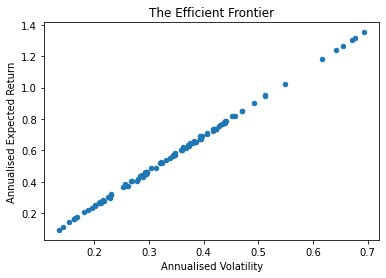

In [31]:

# According to MPT, there is an Efficient Frontier (EF) of portfolios
# Each portfolio offers a given amount of return for a given amount of risk
# The portfolio chosen by the investor from the EF can be optimised according to their acceptable level of risk
# Tangency Portfolio = poftfolio with the max Sharpe ratio (MSR), crosses the Capital Allocation Line
# Global Minimum Volatility Portfolio = portfolio with min volatility, leftmost edge portfolio    
sample_portfolio_df.plot.scatter(x='AnnualisedVolatility', y='AnnualisedReturns')
plt.title('The Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Expected Return')
plt.show()

#### Portfolio Weighting

In [32]:

# The Sharpe ratio is a common measure of risk-adjusted asset return
# NOTE: Sharpe ratios can change quite significantly over time
# Assume risk-free rate = 0, find optimal weights for MSR portfolio
risk_free = 0
sample_portfolio_df['Sharpe'] = (sample_portfolio_df['AnnualisedReturns'] - risk_free)/sample_portfolio_df['AnnualisedVolatility']
MSR_portfolio = sample_portfolio_df.sort_values(by=['Sharpe'], ascending=False)
MSR_weights = MSR_portfolio.iloc[0,:]
print(MSR_weights)
MSR_weights = MSR_portfolio.iloc[0,:num_assets]
print("\nRange of Sharpe ratios:")
print(sample_portfolio_df['Sharpe'].describe()[['min', 'max']])

Bitcoin                 0.840909
S&P500                  0.056818
Gold                    0.102273
AnnualisedReturns       1.352566
AnnualisedVolatility    0.693125
Sharpe                  1.951403
Name: 91, dtype: float64

Range of Sharpe ratios:
min    0.689125
max    1.951403
Name: Sharpe, dtype: float64


In [33]:

# Find optimal weights for GMV portfolio
GMV_portfolio = sample_portfolio_df.sort_values(by=['AnnualisedVolatility'], ascending=True)
GMV_weights = GMV_portfolio.iloc[0,:]
print(GMV_weights)
GMV_weights = GMV_portfolio.iloc[0,:num_assets]

Bitcoin                 0.008403
S&P500                  0.277311
Gold                    0.714286
AnnualisedReturns       0.093636
AnnualisedVolatility    0.135877
Sharpe                  0.689125
Name: 24, dtype: float64


In [34]:

# How did these hypothetical portfolios ACTUALLY perform?
returns_df['MSRPortfolio'] = returns_df.mul(np.array(MSR_weights), axis=1).sum(axis=1)
returns_df['GMVPortfolio'] = returns_df.iloc[:,:-1].mul(np.array(GMV_weights), axis=1).sum(axis=1)

In [35]:

# Compare these results to an equal-weighted portfolio
equal_weighted_returns = returns_df.iloc[:,:num_assets].mul(equal_weights, axis=1).sum(axis=1)
returns_df['EqualPortfolio'] = equal_weighted_returns

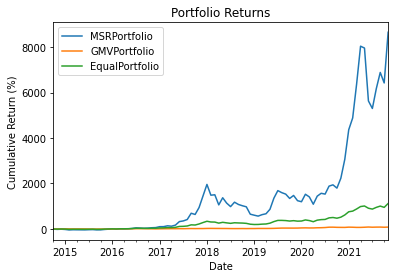

In [36]:

# construct a cumulative returns df, and plot
# GMV portfolio returns tend to be lower (lower risk) than MSR's but more stable and consistent
cum_returns_df = ((1+returns_df).cumprod() - 1) * 100
cum_returns_df[['MSRPortfolio', 'GMVPortfolio', 'EqualPortfolio']].plot() # change colours to reflect the fact that this is a plot of portfolios not individual assets
plt.title('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.show()

In [37]:

print("MSR Portfolio returns: {:.2f}".format(cum_returns_df.MSRPortfolio[-1])+"%.")
print("Equal Weighted Portfolio returns: {:.2f}".format(cum_returns_df.EqualPortfolio[-1])+"%.")
print("GMV Portfolio returns: {:.2f}".format(cum_returns_df.GMVPortfolio[-1])+"%.")

MSR Portfolio returns: 8656.51%.
Equal Weighted Portfolio returns: 1116.96%.
GMV Portfolio returns: 78.43%.


### Portfolio Risk Management


#### Historical Drawdown

In [38]:

gmv_cum_returns = cum_returns_df['GMVPortfolio']
running_max = np.maximum.accumulate(gmv_cum_returns)
running_max[running_max < 1] = 1
gmv_drawdown = (gmv_cum_returns)/running_max - 1
print("The GMV Portfolio maximum drawdown was {:.2f}".format(np.amin(gmv_drawdown[gmv_drawdown > -1] * 100))+"%.")

The GMV Portfolio maximum drawdown was -9.42%.


In [39]:

msr_cum_returns = cum_returns_df['MSRPortfolio']
running_max = np.maximum.accumulate(msr_cum_returns)
running_max[running_max < 1] = 1
msr_drawdown = (msr_cum_returns)/running_max - 1
print("The MSR Portfolio maximum drawdown was {:.2f}".format(np.amin(msr_drawdown[msr_drawdown > -1] * 100))+"%.")

The MSR Portfolio maximum drawdown was -71.27%.


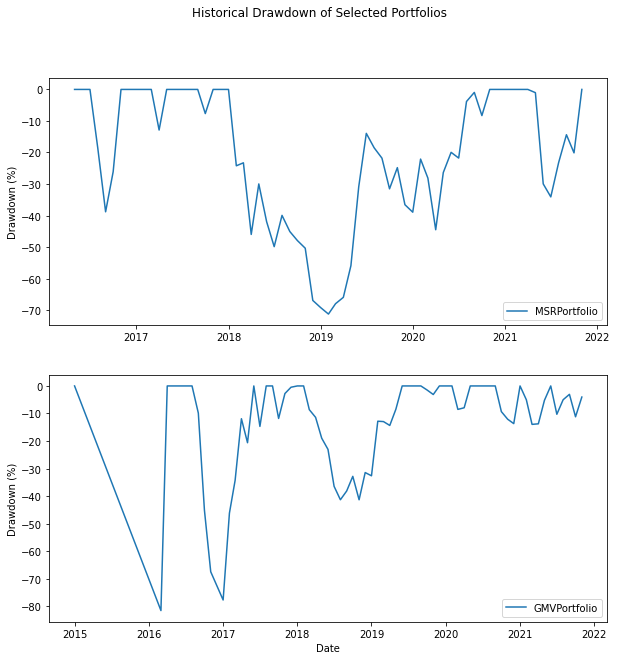

In [40]:

fig, ax = plt.subplots(2,1, figsize=(10,10))
fig.suptitle('Historical Drawdown of Selected Portfolios')
label_position='lower right'

ax[0].plot(msr_drawdown[msr_drawdown > -1]*100, label='MSRPortfolio')
ax[0].set_ylabel('Drawdown (%)')
ax[0].legend(loc=label_position)
ax[1].plot(gmv_drawdown[gmv_drawdown > -1]*100, label='GMVPortfolio')
ax[1].set_ylabel('Drawdown (%)')
ax[1].legend(loc=label_position)

plt.xlabel('Date')
plt.show()

#### Value-at-Risk (VaR) Estimation

In [41]:

# Value at Risk (VaR) is an estimate of how much could be lost in a given time period, within a given confidence level
# How much could be lost during a given period historically? And how confident can we be of that historical estimate?
# Monthly Var at 95% confidence level estimated below, since this is based on daily historical data
# Commonly quoted with quantiles such as 95, 99 and 99.9%

confidence_level = 95
gmv_returns = returns_df['GMVPortfolio']
gmv_returns_perc = gmv_returns*100
gmv_v_a_r = np.percentile(gmv_returns_perc, 100-confidence_level)
print("GMV Portfolio Monthly VaR("+str(confidence_level)+"): {:.2f}".format(gmv_v_a_r)+"%.")

msr_returns = returns_df['MSRPortfolio']
msr_returns_perc = msr_returns*100
msr_v_a_r = np.percentile(msr_returns_perc, 100-confidence_level)
print("MSR Portfolio Monthly VaR("+str(confidence_level)+"): {:.2f}".format(msr_v_a_r)+"%.")

GMV Portfolio Monthly VaR(95): -3.67%.
MSR Portfolio Monthly VaR(95): -22.61%.


In [42]:

# Conditional Value at Risk (CVaR) is an estimate of the expected value of losses sustained on the occassions when the worst x% of scenarios happened
# In the worst x% of scenarios, how much on average could we have lost historically?
# Also known as Expected Shortfall, it will always be lower than Var
# CVaR at 95% confidence level estimated below, based on above VaR
gmv_c_v_a_r = gmv_returns_perc[gmv_returns_perc <= gmv_v_a_r].mean()
print("GMV Monthly CVaR("+str(confidence_level)+"): {:.2f}".format(gmv_c_v_a_r)+"%.")

msr_c_v_a_r = msr_returns_perc[msr_returns_perc <= msr_v_a_r].mean()
print("MSR Monthly CVaR("+str(confidence_level)+"): {:.2f}".format(msr_c_v_a_r)+"%.")

GMV Monthly CVaR(95): -4.07%.
MSR Monthly CVaR(95): -27.46%.


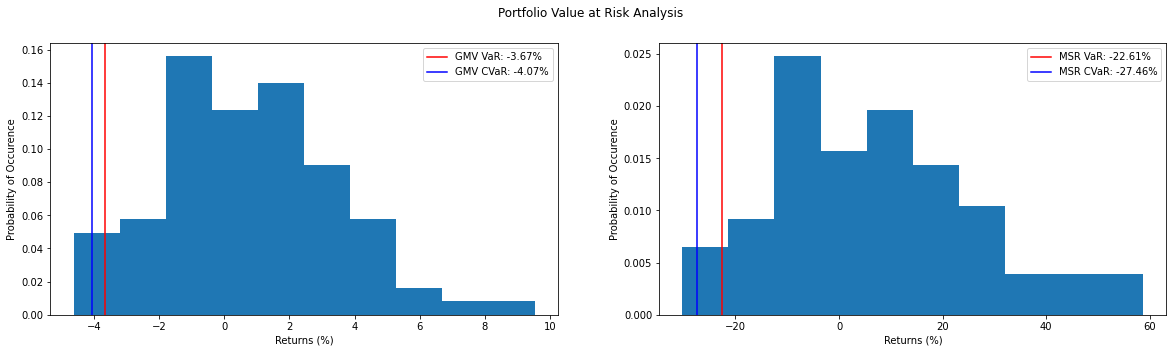

In [43]:

fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Portfolio Value at Risk Analysis')
y_label = 'Probability of Occurence'
x_label = 'Returns (%)'

ax[0].hist(sorted(gmv_returns_perc), density=True)
ax[0].axvline(x=gmv_v_a_r, color='r', linestyle='-', label='GMV VaR: {0:.2f}%'.format(gmv_v_a_r))
ax[0].axvline(x=gmv_c_v_a_r, color='b', linestyle='-', label='GMV CVaR: {0:.2f}%'.format(gmv_c_v_a_r))
ax[0].set_ylabel(y_label)
ax[0].set_xlabel(x_label)
ax[0].legend()

ax[1].hist(sorted(msr_returns_perc), density=True)
ax[1].axvline(x=msr_v_a_r, color='r', linestyle='-', label='MSR VaR: {0:.2f}%'.format(msr_v_a_r))
ax[1].axvline(x=msr_c_v_a_r, color='b', linestyle='-', label='MSR CVaR: {0:.2f}%'.format(msr_c_v_a_r))
ax[1].set_ylabel(y_label)
ax[1].set_xlabel(x_label)
ax[1].legend()

plt.show()

In [44]:

# Above estimations use empirical observations. What if a some loss never occured?
# A better approach would be to sample from a probability distribution
# Assume returns normally distributed, calculate Parametric VaR

gmv_ret_mu = np.mean(gmv_returns)
gmv_ret_vol = np.std(gmv_returns)
gmv_p_v_a_r = stats.norm.ppf((100-confidence_level)/100, gmv_ret_mu, gmv_ret_vol)
print("GMV Monthly PVaR("+str(confidence_level)+"): {:.2f}".format(gmv_p_v_a_r*100)+"%.")

msr_ret_mu = np.mean(msr_returns)
msr_ret_vol = np.std(msr_returns)
msr_p_v_a_r = stats.norm.ppf((100-confidence_level)/100, msr_ret_mu, msr_ret_vol)
print("MSR Monthly PVaR("+str(confidence_level)+"): {:.2f}".format(msr_p_v_a_r*100)+"%.")

GMV Monthly PVaR(95): -3.70%.
MSR Monthly PVaR(95): -24.79%.


#### Monte Carlo Simulation 

In [45]:

# Random walks occur everywhere in natural data series; they are highly prevelant in financial data
# Stochastic methods such as random walks are widely used in finance
# Monte Carlo simulations are performed by running several random walks for a given security
# This gives a theoretical basis of estimating the expected future trajectory of the security
# Once Monte Carlo simulations have been performed, it can be used to estimate expected future return, vol, CVaR etc
# For example, below we estimate the future returns of the MSR and GMV portfolio over the next 12 months based on 10,000 Monte Carlo simulations

s0 = 10000 # assuming we start with $10,000
num_periods = 12
num_simulations = 10000

gmv_forecasted_series = []
msr_forecasted_series = []

for i in range(num_simulations):
    gmv_forecasted_returns = np.random.normal(gmv_ret_mu, gmv_ret_vol, num_periods) + 1
    gmv_forecasted_series.append(s0*(gmv_forecasted_returns.cumprod()))
    msr_forecasted_returns = np.random.normal(msr_ret_mu, msr_ret_vol, num_periods) + 1
    msr_forecasted_series.append(s0*(msr_forecasted_returns.cumprod()))



In [46]:

gmv_final_forecasts = [i[-1] for i in gmv_forecasted_series]
msr_final_forecasts = [i[-1] for i in msr_forecasted_series]
print("GMV Portfolio forecasted to return an average of $"+str(round(np.mean(gmv_final_forecasts)))+" in 12 months, with forecasts ranging from $"+str(round(min(gmv_final_forecasts)))+" to $"+str(round(max(gmv_final_forecasts)))+".")
print("MSR Portfolio forecasted to return an average of $"+str(round(np.mean(msr_final_forecasts)))+" in 12 months, with forecasts ranging from $"+str(round(min(msr_final_forecasts)))+" to $"+str(round(max(msr_final_forecasts)))+".")

GMV Portfolio forecasted to return an average of $10871 in 12 months, with forecasts ranging from $7159 to $15525.
MSR Portfolio forecasted to return an average of $22620 in 12 months, with forecasts ranging from $557 to $203241.


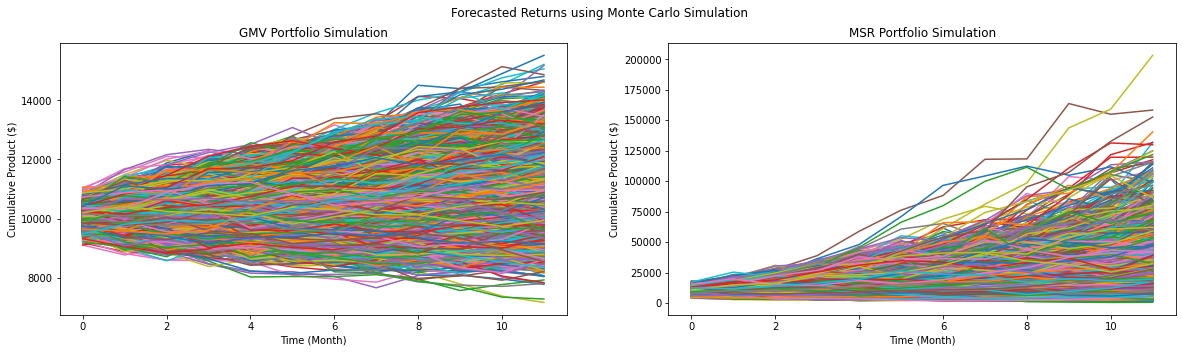

In [47]:

# Plot Monte Carlo simulations
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Forecasted Returns using Monte Carlo Simulation')
x_label='Time (Month)'
y_label='Cumulative Product ($)'

for ser in gmv_forecasted_series:
    ax[0].plot(ser)
ax[0].set_ylabel(y_label)
ax[0].set_xlabel(x_label)
ax[0].set_title('GMV Portfolio Simulation')

for ser in msr_forecasted_series:
    ax[1].plot(ser)
ax[1].set_ylabel(y_label)
ax[1].set_xlabel(x_label)
ax[1].set_title('MSR Portfolio Simulation')
    
plt.show()

## Recommendations

## Conclusion

## Bibliography